In [46]:
import pandas as pd
import numpy as np
import lasio

las = lasio.read(r'../../data_well_log/las_files_Lithostrat_data/7_1-1.las')
df = las.df()
df.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,MUDWEIGHT,ROP,RDEP,RSHA,RMED,SP,DTC,NPHI,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
82.6008,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82.7528,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82.9048,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83.0568,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83.2088,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
las = lasio.read(r'../../data_well_log/las_files_Lithostrat_data/35_4-1.las')
df = las.df()
df.columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'BS', 'ROP', 'RDEP', 'RMED', 'DTS', 'DTC', 'NPHI', 'PEF', 'GR',
       'RHOB', 'DRHO', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC'],
      dtype='object')

In [55]:
log_curves = ['CALI', 'BS', 'DCAL', 'ROP', 'RDEP', 'RSHA', 'RMED', 'SP', 'DTS', 'DTC', 'NPHI', 'GR', 'RHOB', 'DRHO']

for curve in log_curves:
    if curve not in df.columns:
        df[curve] = 0


X = df.fillna(0)
X = X[log_curves]
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X = X.fillna(0)


In [56]:
X

,CALI,BS,DCAL,ROP,RDEP,RSHA,RMED,SP,DTS,DTC,NPHI,GR,RHOB,DRHO
DEPT,,,,,,,,,,,,,,
403.604,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.685957
403.756,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.897596,0.000000,0.0,0.685957
403.908,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857792,0.000000,0.0,0.685957
404.060,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.791115,0.000000,0.0,0.685957
404.212,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.817098,0.000000,0.0,0.685957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957.828,0.0,0.236111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.382298,0.0,0.685957
4957.980,0.0,0.236111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.384776,0.0,0.685957
4958.132,0.0,0.236111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.377819,0.0,0.685957


D: The number of depth points.

N: The number of logging curves (features).
data: The values of the selected logging curves (logging_curves) from the DataFrame (X) converted into a NumPy array.

input_tensor: Reshaped tensor with dimensions (D, 1, N)

values along the x-axis correspond to the different logging curves, and the values along the y-axis correspond to the depth points.

In [57]:
# Reshape the DataFrame. The input data: 1D 
D = len(X.index.values)
N = len(X.columns)

print(f'D: {D}')
print(f'N: {N}')
data = X.to_numpy()

print(data)

# print(depth_values)
input_tensor = np.reshape(data, (D, 1, N))
print(input_tensor.shape)


np.save('1D-image-SegLog/test_well.npy', input_tensor)


D: 29967
N: 14
[[0.         0.         0.         ... 0.         0.         0.68595694]
 [0.         0.         0.         ... 0.         0.         0.68595694]
 [0.         0.         0.         ... 0.         0.         0.68595694]
 ...
 [0.         0.23611111 0.         ... 0.37781945 0.         0.68595694]
 [0.         0.23611111 0.         ... 0.37157599 0.         0.68595694]
 [0.         0.23611111 0.         ... 0.37777271 0.         0.68595694]]
(29967, 1, 14)


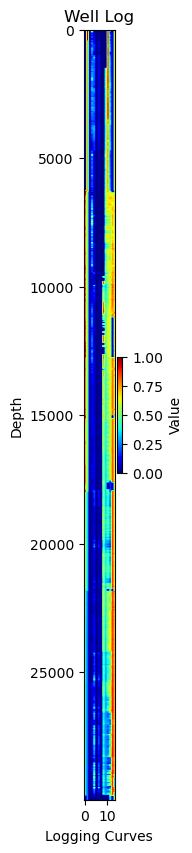

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(0.5, 10))
im = ax.imshow(input_tensor[:, 0, :], cmap='jet', aspect='auto')

# Customize the plot
ax.set_title('Well Log')
ax.set_xlabel('Logging Curves')
ax.set_ylabel('Depth')

# Add colorbar
cbar = fig.colorbar(im, ax=ax, label='Value')

plt.show()

In [54]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11,
                 12345: 12}

labels = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].fillna(12345).astype(int)

# Map numeric labels to lithology names
lithofaces = [lithology_numbers[label] for label in labels]
y = np.array(lithofaces)
np.save('1D-image-SegLog/labels.npy', y)
# Print the processed labels
print(y)

[12 12 12 ... 12 12 12]


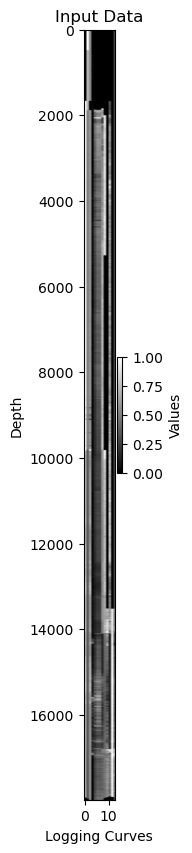

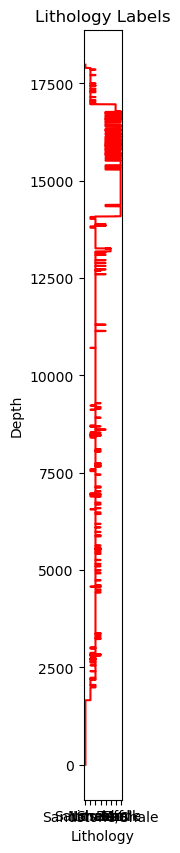

In [29]:
import matplotlib.pyplot as plt

# Plotting the input_tensor data
plt.figure(figsize=(0.5, 10))
plt.imshow(input_tensor.squeeze(), aspect='auto', cmap='gray')
plt.xlabel('Logging Curves')
plt.ylabel('Depth')
plt.title('Input Data')
plt.colorbar(label='Values')

# Plotting the lithology_labels
plt.figure(figsize=(0.5, 10))
plt.plot(y, range(len(y)), color='red')
plt.xlabel('Lithology')
plt.ylabel('Depth')
plt.title('Lithology Labels')

plt.show()


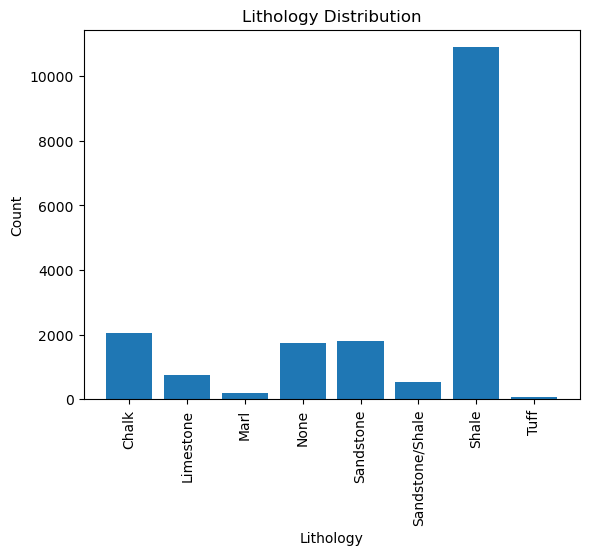

In [30]:
# Map numeric labels to lithology names
lithofaces = [lithology_keys[label] for label in labels]

# Count occurrences of each lithology
unique_lithofaces, counts = np.unique(lithofaces, return_counts=True)

# Create the bar plot
plt.bar(unique_lithofaces, counts)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Lithology')
plt.ylabel('Count')
plt.title('Lithology Distribution')

# Display the plot
plt.show()

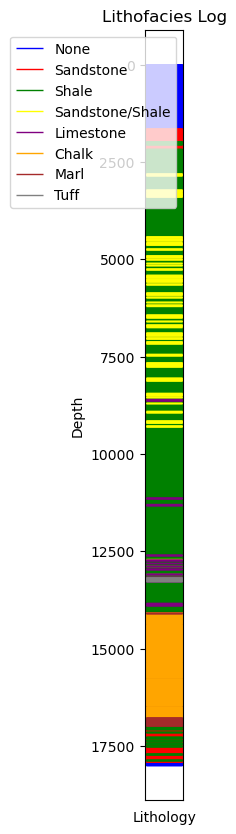

In [69]:
import numpy as np
import matplotlib.pyplot as plt

lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement',
                 0: 'None'}

# # Load the processed labels
# labels = np.load('labels.npy')

labels = df_filled['FORCE_2020_LITHOFACIES_LITHOLOGY'].to_numpy()
# Get unique lithology types
unique_lithofaces = np.unique(labels)

# Assign a color or pattern to each lithology type
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'brown', 'gray', 'cyan', 'magenta', 'black']

# Create the plot
fig, ax = plt.subplots(figsize=(0.5, 10))

# Iterate over unique lithology types
for i, lithoface in enumerate(unique_lithofaces):
    # Get depths where the lithology occurs
    litho_depths = np.where(labels == lithoface)[0]
    # Plot horizontal lines at each depth point where the lithology occurs
    ax.hlines(litho_depths, 0, 1, color=colors[i], linewidth=1, label=lithology_keys.get(lithoface, 'Unknown'))

# Set labels and title
plt.xlabel('Lithology')
plt.ylabel('Depth')
plt.title('Lithofacies Log')

# Reverse the y-axis to show deeper depths at the bottom
ax.invert_yaxis()

# Remove x-axis ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

# Add legend
plt.legend()

# Display the plot
plt.show()
